In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('temp.csv')
print(df.head()) 

              datetime    LA   NY
0  2013-01-01 00:00:00  11.7 -1.1
1  2013-01-01 01:00:00  10.7 -1.7
2  2013-01-01 02:00:00   9.9 -2.0
3  2013-01-01 03:00:00   9.3 -2.1
4  2013-01-01 04:00:00   8.8 -2.3


In [23]:
df['date'] = pd.to_datetime(df['datetime'])

In [27]:
# Identify outliers using IQR method
def identify_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

Text(0.5, 1.0, 'NY Temperatures')

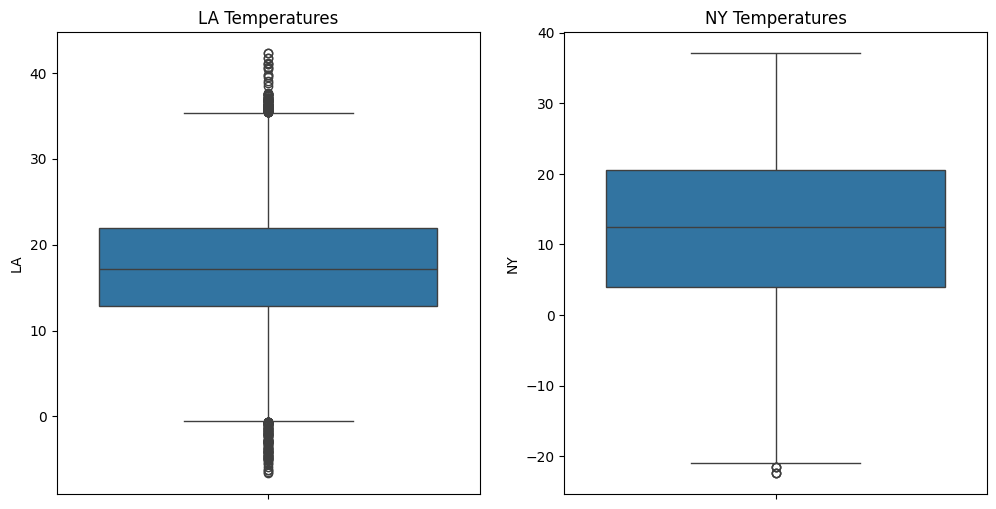

In [28]:
# Visualise the data using boxplot
plt.figure(figsize=(12,6))


#LA Temperature
plt.subplot(1,2,1)
sns.boxplot(y=df['LA'])
plt.title('LA Temperatures')

#NY Temperature
plt.subplot(1,2,2)
sns.boxplot(y=df['NY'])
plt.title('NY Temperatures')

In [34]:
# Outliers detection
LA_outliers_iqr = identify_outliers_iqr(df['LA'])
NY_outliers_iqr = identify_outliers_iqr(df['NY'])

print('Outliers in LA Temperatures using IQR method : ')
print(df.iloc[LA_outliers_iqr])

print('Outliers in NY Temperatures using IQR method : ')
print(df.iloc[NY_outliers_iqr])




Outliers in LA Temperatures using IQR method : 
Empty DataFrame
Columns: [datetime, LA, NY, date]
Index: []
Outliers in NY Temperatures using IQR method : 
                  datetime   LA    NY                date
18749  2015-02-21 05:00:00  9.3 -21.6 2015-02-21 05:00:00
18750  2015-02-21 06:00:00  8.9 -21.6 2015-02-21 06:00:00
18751  2015-02-21 07:00:00  6.9 -21.6 2015-02-21 07:00:00
18752  2015-02-21 08:00:00  6.1 -22.4 2015-02-21 08:00:00
18753  2015-02-21 09:00:00  5.6 -22.4 2015-02-21 09:00:00
18754  2015-02-21 10:00:00  4.7 -22.4 2015-02-21 10:00:00
